In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, AveragePooling2D

In [4]:
# Loading dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalizing dataset
train_X = train_X/255
test_X = test_X/255
train_X.shape

(60000, 28, 28)

In [5]:
# One hot encoding Y 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

train_Y = one_hot(train_y).T
test_Y = one_hot(test_y).T

LeNet-5 architecture is a very efficient convolutional neural network for handwritten character recognition. 
Here is the model:

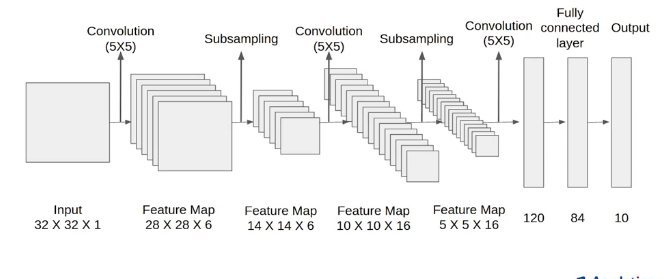

In [6]:
# Creating LeNet model
model = keras.Sequential()
model.add(Conv2D(6, (5, 5), activation='linear', strides=1, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=2, strides=2))
model.add(Conv2D(16, (5, 5), activation='linear', strides=1))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 activation (Activation)     (None, 24, 24, 6)         0         
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                      

In [8]:
# Selecting batch size and training the model
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(64)
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2434 - accuracy: 0.9244 - val_loss: 0.1123 - val_accuracy: 0.9631
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0818 - accuracy: 0.9747 - val_loss: 0.0779 - val_accuracy: 0.9743
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0608 - val_accuracy: 0.9793
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0544 - val_accuracy: 0.9807
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0547 - val_accuracy: 0.9821
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0577 - val_accuracy: 0.9815
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0579 - val_accuracy:

In [9]:
history.history

{'loss': [0.2434450089931488,
  0.08179977536201477,
  0.06063195317983627,
  0.05050252377986908,
  0.04318202659487724,
  0.03782328963279724,
  0.03392164781689644,
  0.03102109767496586,
  0.029743047431111336,
  0.027097225189208984],
 'accuracy': [0.9243666529655457,
  0.9747166633605957,
  0.9811833500862122,
  0.9841499924659729,
  0.9868166446685791,
  0.9884999990463257,
  0.9894333481788635,
  0.9907333254814148,
  0.9908499717712402,
  0.9915833473205566],
 'val_loss': [0.11232121288776398,
  0.07787597179412842,
  0.060775578022003174,
  0.054438311606645584,
  0.054666053503751755,
  0.05765300989151001,
  0.05787735432386398,
  0.05871040001511574,
  0.0574386827647686,
  0.055634040385484695],
 'val_accuracy': [0.963100016117096,
  0.9743000268936157,
  0.9793000221252441,
  0.9807000160217285,
  0.9821000099182129,
  0.9815000295639038,
  0.9814000129699707,
  0.9814000129699707,
  0.9819999933242798,
  0.9837999939918518]}

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

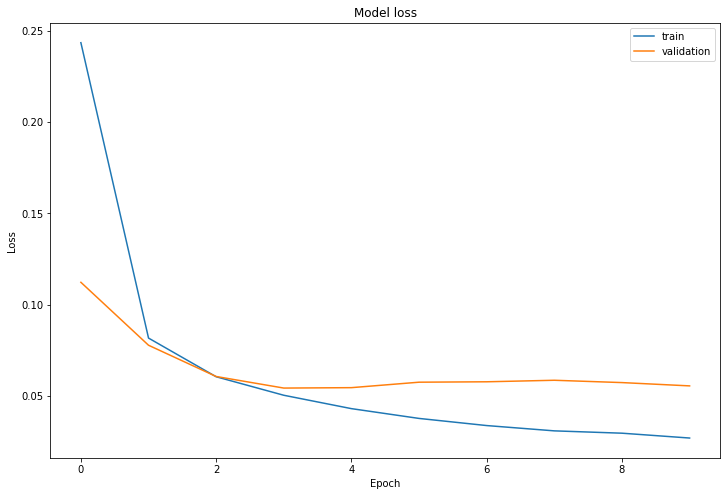

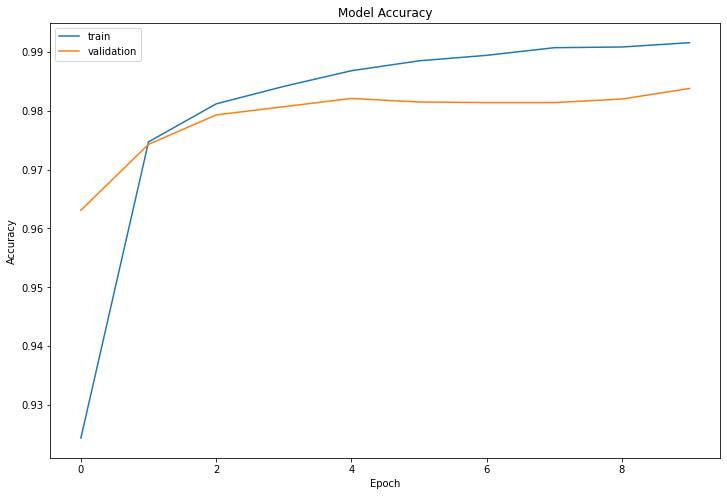

In [15]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
import warnings
warnings.filterwarnings('ignore')
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [10]:
# Creating list of predictions
predict = model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [18]:
# Comparing predictions with actual values
def give_num(lst):
    return np.argmax(lst)

i = 666
print("Actual value: ", give_num(test_Y[i]), "\nPredicted value: ", give_num(predict[i]))

Actual value:  7 
Predicted value:  7
